# Análise de séries temporais em Python

In [1]:
# Versão da linguagem Python utilizada para este projeto
from platform import python_version
print('Versão:', python_version())

Versão: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Carregando os dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(365, 2)

In [5]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
# Visualizando os primeiros registros
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
# Visualizando os últimos registros
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


# Pré-Processamento dos dados

In [8]:
# Valor mínimo da coluna data
df_dsa['Data'].min()

'2023-01-01'

In [9]:
# Valor máximo da coluna data
df_dsa['Data'].max()

'2023-12-31'

In [10]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
# Converte a coluna de data no tipo datatime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [12]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [13]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [17]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

# Análise exploratória

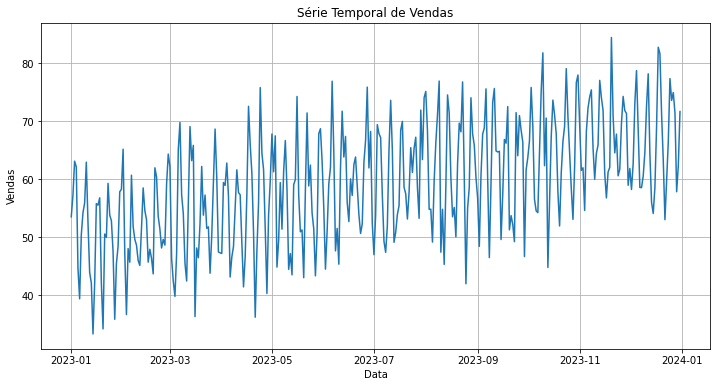

In [19]:
# Cria o grárico da série temporal (sem formatação)

plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

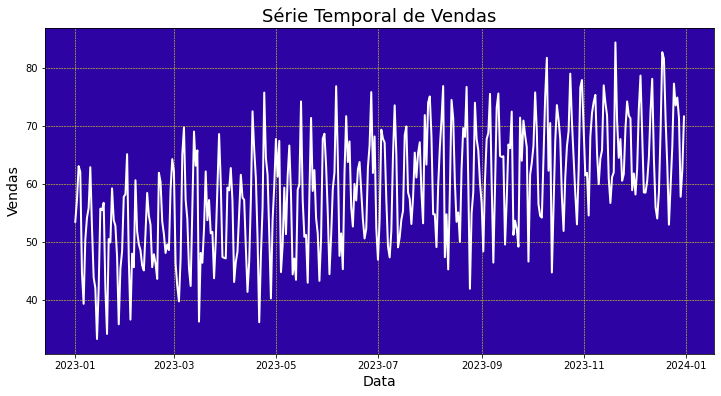

In [20]:
# Cria o gráfico da série temporal (com formatação)

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'white', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

# Suavização Exponencial

In [21]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [22]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

In [23]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

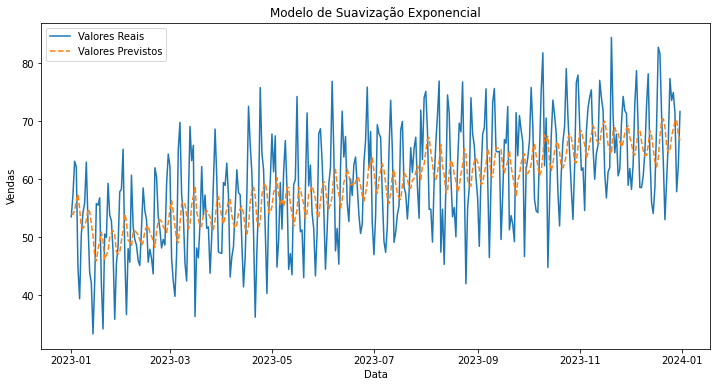

In [24]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

# Deploy e previsão com o modelo treinado

In [25]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [26]:
print('Previsão do Total de Vendas Para Janeiro/2024:', round(previsoes[0], 4))

Previsão do Total de Vendas Para Janeiro/2024: 67.6499
